#Introduction to NLP fundamentals

NLP has the goal of deriving information out of natural lauguage

Another common term for NLP problem is sequence to sequence proble(seq2seq)

In [ ]:
## Check GPU
!nvidia-smi

Tue Nov 12 08:06:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0              29W /  70W |   4203MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Get helper functions

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-11-12 08:06:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2024-11-12 08:06:04 (15.3 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
#Import series of helper functions for the notebook
from helper_functions import plot_loss_curves, compare_historys, create_tensorboard_callback, unzip_data

##Get a text dataset

The dataset is the Kaggle's introduction to NLP dataset (text samples of Tweets labelled as disaster or not disaster)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

#Unzip data
unzip_data("nlp_getting_started.zip")

--2024-11-12 08:06:05--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.207, 74.125.199.207, 74.125.142.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip.1’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2024-11-12 08:06:05 (142 MB/s) - ‘nlp_getting_started.zip.1’ saved [607343/607343]



## Visualizing a text dataset

To visualize the text first we've to read them using python or using pandas

In [ ]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
#Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
#What does the text dataframe looks like?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
#How many total samples are there?
len(train_df),len(test_df)

(7613, 3263)

In [ ]:
#let's visualize some random training examples
import random
random_index = random.randint(0,len(train_df)-5)#create random index not total than higher sample
for row in train_df_shuffled[["text","target"]][random_index:random_index+5].itertuples():
  _,text,target=row
  print(f"Target: {target}","(real disaster)" if target>0 else "(not disaster)")
  print(f"text:\n{text}\n")
  print("-----------\n")

Target: 1 (real disaster)
text:
Man killed in crash in Barrington Hills: A Hoffman Estates man was killed in a single-car crash Wednesday afte... http://t.co/b6NphxOrZg

-----------

Target: 0 (not disaster)
text:
I'm an emotional wreck watching emmerdale

-----------

Target: 0 (not disaster)
text:
Robert Ballew's log statements are always at the FATAL level.

-----------

Target: 0 (not disaster)
text:
@bigburgerboi55 flat footballs!!?? More like he flattened the Spartans from crushing them back in the day!!!! #HAIL

-----------

Target: 0 (not disaster)
text:
@Sammysosita smoke a blunt &amp; get through it.. no more ciggs for you.

-----------



###Split data into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_sentences, val_sentences, train_labels ,val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                train_df_shuffled["target"].to_numpy(),
                                                                test_size=0.1,
                                                                random_state=42)

In [ ]:
#check the lenghts
len(train_sentences),len(train_labels),len(val_sentences),len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
#Check the first 10 samples
train_sentences[:10],train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

##Converting text into numbers
When dealing with a text problem, one of the first things we've to do before building a model is to convert out text into numbers.

There are few ways:
* Tokenization - straight mapping from token to numbers(can be modelled but quickly gets too big)
* Embedding - richer representation of relationships between tokens(can limit size + can be learned)

##Text Vectoriztion(tokeniztion)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [ ]:
#Use the default TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens=None, #how many words in vocab(automatically add <oou>),
                                    standardize='lower_and_strip_punctuation',
                                    split="whitespace",
                                    ngrams=None,
                                    output_mode="int",
                                    output_sequence_length=None, #how long you want to be in sequence)
                                    pad_to_max_tokens=False)

In [ ]:
#Find the average number of tokens(words) in framing tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
#setup tetx vectoriztion variables
max_vocab_length = 10000 #max no.of words to have in our vocabulary
max_length = 15 #max length our sequence will be
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
#Fit the text vectorizer to training text
text_vectorizer.adapt(train_sentences)

In [ ]:
#Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
#Choose a random sentence from training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/2Jr3Yo55dr

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[356, 690, 280,  26,  20, 171, 242, 176, 420,   7,   2, 117,   6,
        161,  65]])>

In [ ]:
#Get the unique words in vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


###Creating an Embedding using an Embedding layer

tf.keras.Embedding - turns positive integers into dense vector of fixed size

The parameters we use in embedding layer are:
* 'input_dim' = the size of our vocabulary
* 'output_dim' = the size of the output embedding vector
* 'input_length' = length of sequences being passed to embedding layer

In [ ]:
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             input_length=max_length)

In [ ]:
#Get a random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\n\nEmbedded version:")
#Embed the random sentences(turn it into dense vectors of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
What would you do if you were trapped in a collapsed circus tent with a bunch of clowns? http://t.co/6HKCa1dSna

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.02508004, -0.0030418 ,  0.0349783 , ...,  0.02869031,
          0.02710552,  0.02194374],
        [-0.02431971, -0.0265817 , -0.00551139, ..., -0.0477621 ,
          0.0076025 ,  0.04311087],
        [ 0.03221962,  0.03673183,  0.03812835, ..., -0.03613968,
         -0.01999047, -0.02470015],
        ...,
        [-0.0258414 , -0.04720321,  0.02319373, ...,  0.04638569,
         -0.00287727, -0.02762978],
        [-0.02534934,  0.03119982, -0.01960282, ..., -0.00674641,
         -0.00963084, -0.006328  ],
        [ 0.02175337, -0.01853081,  0.03124459, ...,  0.04779417,
          0.04499925,  0.00615358]]], dtype=float32)>

In [ ]:
#Check out a single token's embedding
sample_embed[0][0],sample_embed[0][0].shape,random_sentence[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.02508004, -0.0030418 ,  0.0349783 , -0.01896644,  0.01555992,
         0.03479961, -0.03965843,  0.04147426,  0.00122653, -0.04520632,
         0.01339437, -0.00586805, -0.03648887, -0.04270083, -0.00867059,
        -0.00111022, -0.00521331,  0.0070586 ,  0.02297752, -0.0009677 ,
         0.004444  ,  0.00239591, -0.02275453, -0.03012305, -0.03633589,
        -0.04719729, -0.01611203, -0.03563595, -0.04995027,  0.04739584,
        -0.04662362,  0.02187507, -0.04751321,  0.01157486,  0.04740551,
         0.02330326,  0.02808041, -0.01652981,  0.00693765,  0.04483915,
         0.04414579,  0.01649183,  0.01274863, -0.04692829,  0.00894146,
        -0.01525997, -0.04359635,  0.03170309, -0.03715595, -0.0395037 ,
         0.01695168,  0.03451271, -0.02918684,  0.04942239,  0.01430145,
         0.03523085, -0.00108358, -0.04464045,  0.04608243, -0.01678316,
        -0.03128276, -0.04136027,  0.02816853, -0.03186817,  0.04664732,
  

##Modelling a text dataset

* Model 0:Navie Bayes(baseline)
* Model 1:Feed-farward neural network(dense model)
* Model 2:LSTM model(RNN)
* Model 3:GRU model(RNN)
* Model 4:Bidirectional-LSTM model(RNN)
* Model 5:1D Convolutional Neural network(CNN)
* Model 6:Tensorflow hub pretained features extraction(using transfer learning for NLP)
* Model 7:Same as model6 with 10% of training data
####How to approach?
* Create a model
* Build a model
* Fit a model
* Evaluate a model

###Model 0 : Getting a baseline
 creating a baseline model using sklearn navie baye's model by using TF-IDE formula to convert our words into numbers

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
#Create tokenization and modelling pipeline
model_0 = Pipeline([
    ("tfidf",TfidfVectorizer()),
    ("clf",MultinomialNB())
  ])
#Fit the pippeline to training data
model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
#Evaluate baseline model
baseline_score = model_0.score(val_sentences,val_labels)
print(f"Baseline model accuracy: {baseline_score*100:.2f}%")

Baseline model accuracy: 79.27%


In [ ]:
#Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

###Creating an evaluation functions for our model experiments
* Accuracy
* Precision
* Recall
* F1-score

In [ ]:
#Function to evaluate:accuracy,precision,recall,f1-score
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
def calculate_results(y_true,y_preds):
  """
  Calculates model accuracy,precision,recall and f1-score of a binary classification model
  """
  #Calculate model accuracy
  model_accuracy = accuracy_score(y_true,y_preds)*100
  #Calculate model precision,recall and f1-score using weighted average
  model_precision,model_recall,model_f1,_ = precision_recall_fscore_support(y_true,y_preds,average="weighted")
  model_results = {"accuracy":model_accuracy,
                   "precision":model_precision,
                   "recall":model_recall,
                   "f1-score":model_f1}
  return model_results

In [ ]:
#Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_preds=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1-score': 0.7862189758049549}

###Mode 1:A simple dense model


In [ ]:
#create a tensorboard callback
from helper_functions import create_tensorboard_callback
#Create a directory to save Tensorboard callback
SAVE_DIR = "model_logs"

In [ ]:
#Build model with Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype=tf.string)#inputs in 1D
x = text_vectorizer(inputs)#turn inputs text into numbers
x = embedding(x)#Create an embedding into numberized inputs
#x = layers.Dense(128,activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)#condense feature vector for each token to 1 vector
x = layers.Dense(64,activation="relu")(x)#create 64 dense layer
x = layers.Dense(32,activation="relu")(x)#create 32 dense layers
x = layers.Dense(16,activation="relu")(x)#create 16 dense layers
outputs = layers.Dense(1,activation="sigmoid")(x)#create output layer
model_1 = tf.keras.Model(inputs,outputs,name="model_1_dense")
#Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#model summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)              

In [ ]:
#Fit the model
model_1_history = model_1.fit(x=train_sentences,
                              epochs=7,
                              y=train_labels,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20241112-080608
Epoch 1/7
215/215 [==============================] - 11s 38ms/step - loss: 0.5557 - accuracy: 0.7116 - val_loss: 0.4659 - val_accuracy: 0.7848
Epoch 2/7
215/215 [==============================] - 2s 10ms/step - loss: 0.3288 - accuracy: 0.8656 - val_loss: 0.5020 - val_accuracy: 0.7703
Epoch 3/7
215/215 [==============================] - 2s 9ms/step - loss: 0.2161 - accuracy: 0.9180 - val_loss: 0.5394 - val_accuracy: 0.7703
Epoch 4/7
215/215 [==============================] - 2s 7ms/step - loss: 0.1516 - accuracy: 0.9428 - val_loss: 0.6745 - val_accuracy: 0.7730
Epoch 5/7
215/215 [==============================] - 2s 9ms/step - loss: 0.1080 - accuracy: 0.9564 - val_loss: 0.7471 - val_accuracy: 0.7756
Epoch 6/7
215/215 [==============================] - 3s 15ms/step - loss: 0.0862 - accuracy: 0.9639 - val_loss: 0.9109 - val_accuracy: 0.7822
Epoch 7/7
215/215 [==============================] - 3s 15ms/step - loss: 0.

In [ ]:
#Evaluate results
model_1.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 5ms/step - loss: 1.1361 - accuracy: 0.7677


[1.136063814163208, 0.7677165269851685]

In [ ]:
#Make predictions and evaluate those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 [==============================] - 0s 6ms/step


(762, 1)

In [ ]:
#Convert model prediction probabilites into labels form
model_1_pred = tf.squeeze(tf.round(model_1_pred_probs))
model_1_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:

#Calculate model_1 results
model_1_results = calculate_results(y_true=val_labels,
                                    y_preds=model_1_pred)
model_1_results

{'accuracy': 76.77165354330708,
 'precision': 0.7708748797233624,
 'recall': 0.7677165354330708,
 'f1-score': 0.7648367897674763}

##Visualizing learned embeddings


In [ ]:
#Get vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab),words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
#Get weight matrix of embedding layer
embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights

array([[-0.03253814,  0.035391  ,  0.01757056, ...,  0.0071722 ,
        -0.02623272,  0.01513227],
       [-0.03484468,  0.00623478,  0.05406905, ..., -0.02035616,
         0.00563769,  0.0121965 ],
       [-0.04574033,  0.03480017,  0.02966645, ...,  0.04545527,
        -0.02596884, -0.00857479],
       ...,
       [-0.03562097,  0.01556532, -0.02229618, ...,  0.0085394 ,
         0.00612029,  0.03568257],
       [ 0.0332225 ,  0.05477416,  0.01571291, ...,  0.07475278,
         0.02758713, -0.02431495],
       [-0.00833878,  0.02448048,  0.07147738, ...,  0.03319629,
         0.09382838,  0.07737115]], dtype=float32)

Model 1 has learned to represent our tokens

To do so,Tensorflow has a handy tool called projector

And tensorflow also has an incredible guide on word embeddings themselves

###Recurrent Neural networks(RNN)
RNN's are useful for sequence data

The premise of a recurrent neural network is to use the representation of a previous input to aid the representation of a layer input

Overview:
* MIT's sequence modelling
* Chris Olah's ntro to LSTM
* Andrej Karpathy's the unresonable effectiveness of ne

###Model 2:LSTM
LSTM = Long Short Term Memory

In [ ]:
#Create an LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64,activation="relu", return_sequences=True)(x) # Add return_sequences=True to the first LSTM
x = layers.LSTM(32,activation="relu",return_sequences=True)(x) # Add return_sequences=True to the second LSTM
x = layers.Dense(16,activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs,outputs,name="model_2_LSTM")

In [ ]:
#Model summary
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            12416     
                                                                 
 dense_6 (Dense)             (None, 15, 16)            528       
                                                      

In [ ]:
#Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
#Fit the model
model_2_histroy = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,"model_2_LSTM ")]
                              )

Saving TensorBoard log files to: model_logs/model_2_LSTM /20241112-080723
Epoch 1/5
215/215 [==============================] - 26s 105ms/step - loss: 0.2683 - accuracy: 0.8939 - val_loss: 0.8648 - val_accuracy: 0.7664
Epoch 2/5
215/215 [==============================] - 14s 68ms/step - loss: 0.1075 - accuracy: 0.9574 - val_loss: 1.2771 - val_accuracy: 0.7703
Epoch 3/5
215/215 [==============================] - 17s 77ms/step - loss: 0.1029 - accuracy: 0.9588 - val_loss: 1.3702 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 22s 104ms/step - loss: 0.0764 - accuracy: 0.9673 - val_loss: 1.3438 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 23s 105ms/step - loss: 0.0662 - accuracy: 0.9701 - val_loss: 1.9689 - val_accuracy: 0.7625


In [ ]:
#Make predictions
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 0s 8ms/step


array([[8.4371660e-03],
       [9.2350900e-01],
       [9.9999905e-01],
       [6.6200599e-02],
       [3.1430414e-08],
       [1.0000000e+00],
       [9.9980003e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [5.1642436e-01]], dtype=float32)

In [ ]:
#Convert model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
#Calculate results
model_2_results = calculate_results(y_true=val_labels,
                                    y_preds=model_2_preds)
model_2_results

{'accuracy': 76.24671916010499,
 'precision': 0.7654290603522874,
 'recall': 0.7624671916010499,
 'f1-score': 0.7595223669373627}

###Model 3:GRU
Another popular and effictive RNN Component is the GRU or Gated

In [ ]:
#Build an RNN model using GRU cell
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64,return_sequences=True)(x)
x = layers.GRU(64,activation="relu",return_sequences=True)(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs,outputs,name="model_3_GRU")

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=create_tensorboard_callback(SAVE_DIR,"model_3_GRU"))

Saving TensorBoard log files to: model_logs/model_3_GRU/20241112-080948
Epoch 1/5
215/215 [==============================] - 28s 98ms/step - loss: 0.1565 - accuracy: 0.9574 - val_loss: 0.9950 - val_accuracy: 0.7638
Epoch 2/5
215/215 [==============================] - 17s 78ms/step - loss: 0.0718 - accuracy: 0.9682 - val_loss: 1.4189 - val_accuracy: 0.7664
Epoch 3/5
215/215 [==============================] - 11s 50ms/step - loss: 0.0563 - accuracy: 0.9736 - val_loss: 1.4053 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 8s 38ms/step - loss: 0.0520 - accuracy: 0.9736 - val_loss: 1.4718 - val_accuracy: 0.7612
Epoch 5/5
215/215 [==============================] - 8s 36ms/step - loss: 0.0564 - accuracy: 0.9752 - val_loss: 1.6754 - val_accuracy: 0.7664


In [ ]:
#model_3 summary
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 gru_1 (GRU)                 (None, 15, 64)            24960     
                                                                 
 global_average_pooling1d_2  (None, 64)                0         
  (GlobalAveragePooling1D)                             

In [ ]:
#Make predictions with GRI model
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 1s 9ms/step


array([[2.5665504e-01],
       [7.8955144e-01],
       [9.9999714e-01],
       [4.7601447e-02],
       [3.1395507e-06],
       [9.9999964e-01],
       [9.9967587e-01],
       [1.0000000e+00],
       [9.9999988e-01],
       [6.5304363e-01]], dtype=float32)

In [ ]:
#Convert model_3 pred probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
#Calculate results for model_3
model_3_results = calculate_results(y_true=val_labels,
                                    y_preds=model_3_preds)
model_3_results

{'accuracy': 76.64041994750657,
 'precision': 0.7676724239336781,
 'recall': 0.7664041994750657,
 'f1-score': 0.7644156046177798}

###Model 4:Bidirectional RNN
Normal RNN's goes from left to right(just like text) however bidirectional RNN's go from right to left and then left to right

In [ ]:
#Build a bidirectional model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64,return_sequences=True))(x)
x = layers.Bidirectional(layers.GRU(64,return_sequences=True))(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs,outputs,name="model_4_bidirectional")

#Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=create_tensorboard_callback(SAVE_DIR,"model_4_bidirectional"))

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20241112-081120
Epoch 1/5
215/215 [==============================] - 18s 47ms/step - loss: 0.1068 - accuracy: 0.9656 - val_loss: 1.2093 - val_accuracy: 0.7493
Epoch 2/5
215/215 [==============================] - 3s 16ms/step - loss: 0.0496 - accuracy: 0.9759 - val_loss: 1.2311 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 7s 32ms/step - loss: 0.0489 - accuracy: 0.9774 - val_loss: 1.4444 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0429 - accuracy: 0.9785 - val_loss: 1.6801 - val_accuracy: 0.7598
Epoch 5/5
215/215 [==============================] - 7s 34ms/step - loss: 0.0397 - accuracy: 0.9784 - val_loss: 1.7755 - val_accuracy: 0.7520


In [ ]:
#Model summary
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 15, 128)           98816     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 15, 128)           74496     
 onal)                                                           
                                             

In [ ]:
#Make predictions
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 3s 10ms/step


array([[9.9300122e-01],
       [6.1771154e-01],
       [9.9998426e-01],
       [1.0240548e-01],
       [1.2457708e-05],
       [9.9986899e-01],
       [3.6972499e-01],
       [9.9998987e-01],
       [9.9998748e-01],
       [9.9454767e-01]], dtype=float32)

In [ ]:
#Convert pred probs to pred labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 0., 1., 1., 1.], dtype=float32)>

In [ ]:
#Calculate results
model_4_results = calculate_results(y_true=val_labels,
                                   y_preds=model_4_preds)
model_4_results

{'accuracy': 75.19685039370079,
 'precision': 0.7515223308121474,
 'recall': 0.7519685039370079,
 'f1-score': 0.751525037683425}

##Convolution Neural networks for text(and other types of sequences)

###Architecture
'text(inputs)' -> 'Text_vectorization' -> 'Embedding' -> 'Conv1D layers' -> 'Dense' -> 'output

###Model 5:Conv1D

In [ ]:
#Test out our embedding layers,Conv1D layers and max pooling
from tensorflow.keras import layers
embedding_test = embedding(text_vectorizer(["this is a test sentence"]))
conv_1d = layers.Conv1D(filters=32,
                        kernel_size=5,
                        strides=1,#default
                        activation="relu",
                        padding="same")
conv_1d_output = conv_1d(embedding_test) #pass test embedding through conv 1d layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output) #equivalent to get the most important features or get the faeture with the hightest value
embedding_test.shape,conv_1d_output.shape,max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

In [ ]:
embedding_test

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.0030194 , -0.00549361,  0.06067163, ..., -0.03226689,
          0.08678551,  0.00322894],
        [ 0.02999539,  0.06581526,  0.02534493, ..., -0.00979075,
         -0.01774233, -0.05039119],
        [ 0.00858072,  0.00747317,  0.07090728, ...,  0.02409912,
          0.05027057, -0.03790192],
        ...,
        [-0.01934279,  0.03887057,  0.02577628, ...,  0.00497973,
         -0.0010632 ,  0.0241915 ],
        [-0.01934279,  0.03887057,  0.02577628, ...,  0.00497973,
         -0.0010632 ,  0.0241915 ],
        [-0.01934279,  0.03887057,  0.02577628, ...,  0.00497973,
         -0.0010632 ,  0.0241915 ]]], dtype=float32)>

In [ ]:
conv_1d_output

<tf.Tensor: shape=(1, 15, 32), dtype=float32, numpy=
array([[[0.00000000e+00, 1.70934051e-02, 0.00000000e+00, 3.20178680e-02,
         0.00000000e+00, 1.19360629e-04, 9.48407501e-03, 0.00000000e+00,
         5.49400114e-02, 1.61296129e-02, 2.09658071e-02, 7.00839758e-02,
         0.00000000e+00, 0.00000000e+00, 5.05903885e-02, 1.87252313e-02,
         4.74397093e-02, 0.00000000e+00, 0.00000000e+00, 8.86348188e-02,
         0.00000000e+00, 3.80403437e-02, 5.91744781e-02, 2.83706822e-02,
         2.44405251e-02, 1.12580415e-02, 2.53941398e-02, 0.00000000e+00,
         0.00000000e+00, 6.80503324e-02, 0.00000000e+00, 2.45361459e-02],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 1.38532147e-02, 3.84165607e-02,
         8.17314833e-02, 3.52406316e-03, 0.00000000e+00, 1.53239548e-01,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         6.16416335e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+0

In [ ]:
max_pool_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.06769706, 0.07830771, 0.        , 0.05750928, 0.        ,
        0.03324296, 0.09266096, 0.06626798, 0.08173148, 0.08304822,
        0.0553835 , 0.15323955, 0.04719143, 0.03931793, 0.05059039,
        0.12710398, 0.06164163, 0.        , 0.04624899, 0.09634121,
        0.06515483, 0.06077693, 0.09393014, 0.02837068, 0.03952532,
        0.06801011, 0.05494547, 0.05914221, 0.01432424, 0.10433482,
        0.        , 0.06779449]], dtype=float32)>

In [ ]:
#Create 1D convolutional layer to model_sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64,kernel_size=5,activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs,outputs,name="model_5_conv1d")

#Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=create_tensorboard_callback(SAVE_DIR,"model_5_conv1d"))

Saving TensorBoard log files to: model_logs/model_5_conv1d/20241112-081212
Epoch 1/5
215/215 [==============================] - 13s 46ms/step - loss: 0.1437 - accuracy: 0.9600 - val_loss: 0.8618 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 4s 16ms/step - loss: 0.0731 - accuracy: 0.9742 - val_loss: 0.9879 - val_accuracy: 0.7585
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0596 - accuracy: 0.9775 - val_loss: 1.0364 - val_accuracy: 0.7507
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0529 - accuracy: 0.9793 - val_loss: 1.0985 - val_accuracy: 0.7454
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0502 - accuracy: 0.9784 - val_loss: 1.1716 - val_accuracy: 0.7533


In [ ]:
#Model summary
model_5.summary()

Model: "model_5_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_10 (Dense)            (None, 1)              

In [ ]:
#Make predictions
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[5.3437662e-01],
       [9.3383127e-01],
       [9.9998999e-01],
       [2.2109076e-02],
       [1.4966895e-06],
       [9.7812474e-01],
       [9.3112755e-01],
       [9.9926811e-01],
       [9.9999702e-01],
       [7.3188013e-01]], dtype=float32)

In [ ]:
#Convert model preds to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
#Calculate results
model_5_results = calculate_results(y_true=val_labels,
                                   y_preds=model_5_preds)
model_5_results

{'accuracy': 75.32808398950131,
 'precision': 0.7533943930774577,
 'recall': 0.7532808398950132,
 'f1-score': 0.7518108425860833}

###Model 6:Tensorflow hub Pretrained universal sentence encoders

**Architecture**

inputs -> Embedding layer(USE from tensorflow hub) -> tokens -> Dense -> output

###Model 7:Tensorflow hub Pretrained universal sentence encoders with 10% of training data

In [ ]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,"When you can the universal sentence encoder in a sentence it turns into a sentence embedding"])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [ ]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [ ]:
!pip install tensorflow==2.15.0 tensorflow-hub
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

# Define the KerasLayer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

# Define the model using the functional API instead of Sequential
input_layer = tf.keras.Input(shape=(), dtype=tf.string, name="input_layer")  # Create an input layer
embedding_layer = sentence_encoder_layer(input_layer)  # Apply the hub.KerasLayer
hidden_layer = layers.Dense(64, activation="relu")(embedding_layer)  # Connect the Dense layer
output_layer = layers.Dense(1, activation="sigmoid")(hidden_layer)  # Connect the output layer

model_6 = tf.keras.Model(inputs=input_layer, outputs=output_layer, name="model_6_USE")  # Create the model

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None,)]                 0         
                                                                 
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_11 (Dense)            (None, 64)                32832     
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
#Fit the model
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=create_tensorboard_callback(SAVE_DIR,"tf_hub_sentence_encoder"))

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20241112-081318
Epoch 1/5
215/215 [==============================] - 12s 40ms/step - loss: 0.5059 - accuracy: 0.7808 - val_loss: 0.4520 - val_accuracy: 0.7992
Epoch 2/5
215/215 [==============================] - 6s 29ms/step - loss: 0.4130 - accuracy: 0.8136 - val_loss: 0.4329 - val_accuracy: 0.8097
Epoch 3/5
215/215 [==============================] - 6s 26ms/step - loss: 0.4000 - accuracy: 0.8243 - val_loss: 0.4261 - val_accuracy: 0.8136
Epoch 4/5
215/215 [==============================] - 6s 29ms/step - loss: 0.3913 - accuracy: 0.8285 - val_loss: 0.4227 - val_accuracy: 0.8228
Epoch 5/5
215/215 [==============================] - 4s 16ms/step - loss: 0.3853 - accuracy: 0.8273 - val_loss: 0.4240 - val_accuracy: 0.8123


In [ ]:
#Make predictions
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 13ms/step


array([[0.20610124],
       [0.76907426],
       [0.99254555],
       [0.2430454 ],
       [0.7487744 ],
       [0.7734523 ],
       [0.98670095],
       [0.9821876 ],
       [0.9598008 ],
       [0.09090872]], dtype=float32)

In [ ]:
#Convert pred probababities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
#Calculate moedl 6 performance metrics
model_6_results = calculate_results(y_true=val_labels,
                                    y_preds=model_6_preds)
model_6_results

{'accuracy': 81.23359580052494,
 'precision': 0.812763224356635,
 'recall': 0.8123359580052494,
 'f1-score': 0.8115121319063344}

In [ ]:
#Create a subset of 10% of the training data
train_10_percent = train_df_shuffled.sample(frac=0.1,random_state=42)
train_10_percent.head(),len(train_10_percent)
train_sentences_10_percent = train_10_percent["text"].to_list()
train_labels_10_percent = train_10_percent["target"].to_list()
len(train_sentences_10_percent),len(train_labels_10_percent)

(761, 761)

In [ ]:
#Check the no.of targets in our subsets of data
train_10_percent["target"].value_counts()


,count
target,
0,413
1,348


In [ ]:
#Build the model 7
model_7 = tf.keras.models.clone_model(model_6)
#Compile
model_7.compile(loss="binary_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])
#Summary
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None,)]                 0         
                                                                 
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_11 (Dense)            (None, 64)                32832     
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
#Fit the model
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=create_tensorboard_callback(SAVE_DIR,"tf_hub_sentence_correct_spilt"))

Saving TensorBoard log files to: model_logs/tf_hub_sentence_correct_spilt/20241112-081458
Epoch 1/5
24/24 [==============================] - 7s 52ms/step - loss: 0.6659 - accuracy: 0.7175 - val_loss: 0.6260 - val_accuracy: 0.8058
Epoch 2/5
24/24 [==============================] - 1s 39ms/step - loss: 0.5903 - accuracy: 0.8003 - val_loss: 0.5457 - val_accuracy: 0.8031
Epoch 3/5
24/24 [==============================] - 1s 25ms/step - loss: 0.5165 - accuracy: 0.7989 - val_loss: 0.4781 - val_accuracy: 0.8110
Epoch 4/5
24/24 [==============================] - 1s 25ms/step - loss: 0.4626 - accuracy: 0.8081 - val_loss: 0.4348 - val_accuracy: 0.8215
Epoch 5/5
24/24 [==============================] - 1s 35ms/step - loss: 0.4267 - accuracy: 0.8187 - val_loss: 0.4068 - val_accuracy: 0.8255


In [ ]:
#Make predictions
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 16ms/step


array([[0.2532616 ],
       [0.8356336 ],
       [0.89214694],
       [0.32336184],
       [0.8326827 ],
       [0.8262879 ],
       [0.9038283 ],
       [0.925047  ],
       [0.85610723],
       [0.05922275]], dtype=float32)

In [ ]:
#Convert preds into labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
#Evaluate model 7 predictions
model_7_results = calculate_results(y_true=val_labels,
                                    y_preds=model_7_preds)
model_7_results

{'accuracy': 82.54593175853019,
 'precision': 0.8253155438517923,
 'recall': 0.8254593175853019,
 'f1-score': 0.8253516705746762}

> **Note**: Making a data splits like above leads to data leakage (model_7 trained on 10% data,outperforms model_6 trained on 100%)
###Donot make data spilts which leads data from validation/test sets into training set

In [ ]:
#Making a better dataset spilts(no leakage of data)
train_10_percent_spilts = int(0.1*len(train_sentences))
train_10_percent = train_sentences[:train_10_percent_spilts]
train_labels_10_percent = train_labels[:train_10_percent_spilts]

In [ ]:
import numpy as np
import pandas as pd
pd.Series(np.array(train_labels_10_percent)).value_counts()

,count
0,406
1,279


##Combining performance of each model

In [ ]:
#Combining model results into dataframe
all_model_results = pd.DataFrame({"baseline":baseline_results,
                                  "1_simple__dense":model_1_results,
                                  "2_LSTM":model_2_results,
                                  "3_GRU":model_3_results,
                                  "4_bidirectional":model_4_results,
                                  "5_Conv1D":model_5_results,
                                  "6_tf_hub_use_encoder":model_6_results,
                                  "7_tf_hub_use_encoder":model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1-score
baseline,79.265092,0.811139,0.792651,0.786219
1_simple__dense,76.771654,0.770875,0.767717,0.764837
2_LSTM,76.246719,0.765429,0.762467,0.759522
3_GRU,76.640420,0.767672,0.766404,0.764416
4_bidirectional,75.196850,0.751522,0.751969,0.751525
5_Conv1D,75.328084,0.753394,0.753281,0.751811
6_tf_hub_use_encoder,81.233596,0.812763,0.812336,0.811512
7_tf_hub_use_encoder,82.545932,0.825316,0.825459,0.825352


from matplotlib import pyplot as plt
all_model_results['accuracy'].plot(kind='hist', bins=20, title='accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
all_model_results['precision'].plot(kind='hist', bins=20, title='precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
all_model_results['recall'].plot(kind='hist', bins=20, title='recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
all_model_results['f1-score'].plot(kind='hist', bins=20, title='f1-score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
all_model_results.plot(kind='scatter', x='accuracy', y='precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
all_model_results.plot(kind='scatter', x='precision', y='recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
all_model_results.plot(kind='scatter', x='recall', y='f1-score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
all_model_results['accuracy'].plot(kind='line', figsize=(8, 4), title='accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
all_model_results['precision'].plot(kind='line', figsize=(8, 4), title='precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
all_model_results['recall'].plot(kind='line', figsize=(8, 4), title='recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
all_model_results['f1-score'].plot(kind='line', figsize=(8, 4), title='f1-score')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#Reduce the accuracy to the same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

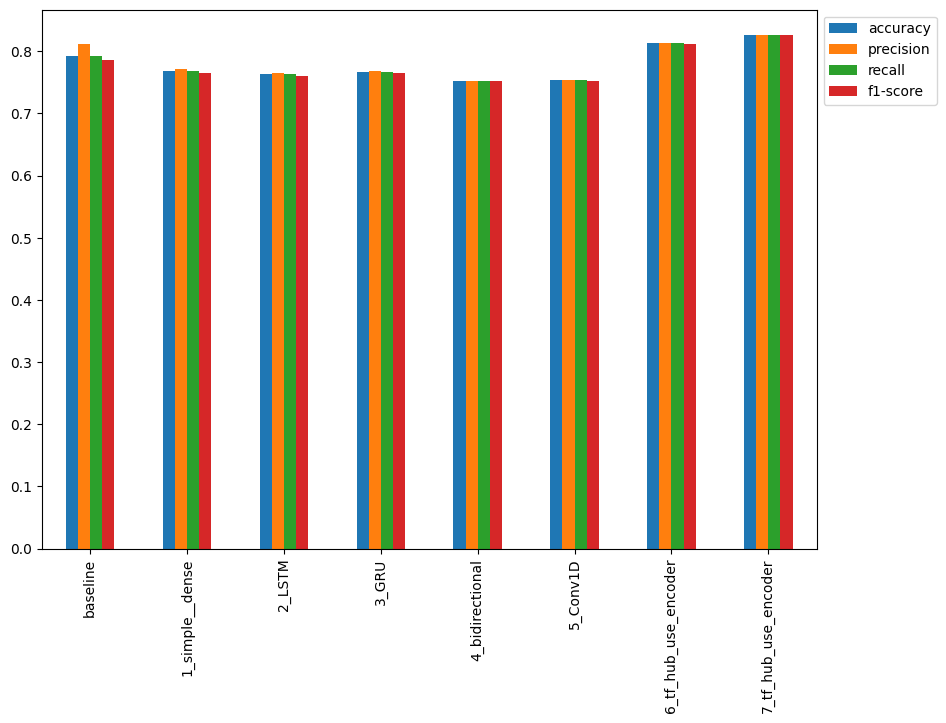

In [ ]:
#Plot and compare all the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

Looks like our pretrained USE TensorFlow Hub models have the best performance, even the one with only 10% of the training data seems to outperform the other models. This goes to show the power of transfer learning.

How about we drill down and get the F1-score's of each model?

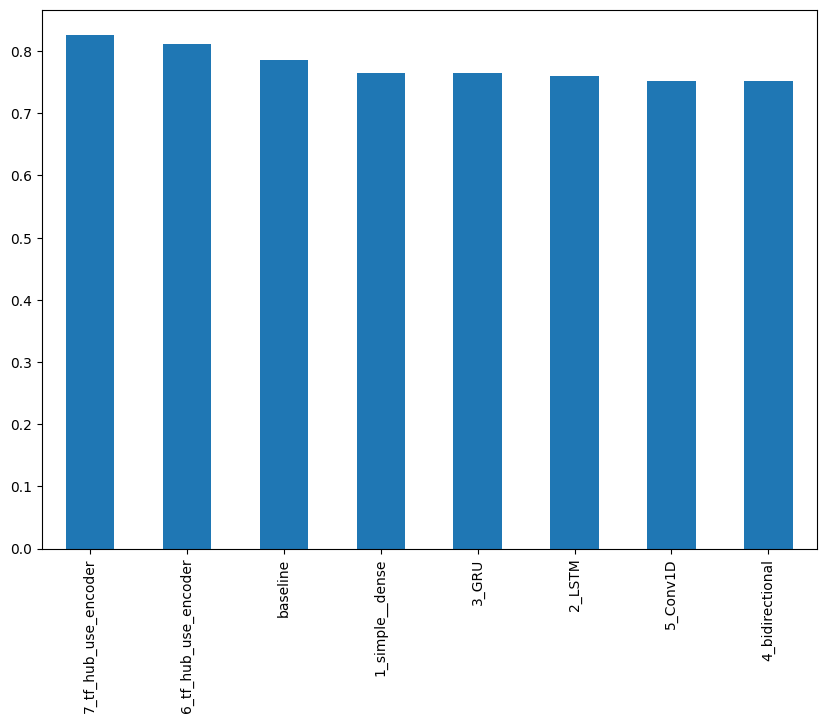

In [ ]:
#Sort model results by f1-score
all_model_results.sort_values("f1-score", ascending=False)["f1-score"].plot(kind="bar", figsize=(10, 7));

##Saving and loading a trained model
There are 2 main formats to save a model in Tensorflow:
1. The HDF5 format
2. The SavedModel format(default when using tensorflow)

##Combining our models (model ensembling/stacking)

In [ ]:
# Get mean pred probs for 3 models
baseline_pred_probs = np.max(model_0.predict_proba(val_sentences), axis=1) # get the prediction probabilities from baseline model
combined_pred_probs = baseline_pred_probs + tf.squeeze(model_2_pred_probs, axis=1) + tf.squeeze(model_6_pred_probs)
combined_preds = tf.round(combined_pred_probs/3) # average and round the prediction probabilities to get prediction classes
combined_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1.], dtype=float32)>

In [ ]:
# Calculate results from averaging the prediction probabilities
ensemble_results = calculate_results(val_labels, combined_preds)
ensemble_results

{'accuracy': 78.60892388451444,
 'precision': 0.7858276106006934,
 'recall': 0.7860892388451444,
 'f1-score': 0.7855631814094975}

In [ ]:
# Add our combined model's results to the results DataFrame
all_model_results.loc["ensemble_results"] = ensemble_results

In [ ]:
# Convert the accuracy to the same scale as the rest of the results
all_model_results.loc["ensemble_results"]["accuracy"] = all_model_results.loc["ensemble_results"]["accuracy"]/100

<ipython-input-123-eb0b96b5da6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_model_results.loc["ensemble_results"]["accuracy"] = all_model_results.loc["ensemble_results"]["accuracy"]/100


In [ ]:
all_model_results

,accuracy,precision,recall,f1-score
baseline,0.792651,0.811139,0.792651,0.786219
1_simple__dense,0.767717,0.770875,0.767717,0.764837
2_LSTM,0.762467,0.765429,0.762467,0.759522
3_GRU,0.766404,0.767672,0.766404,0.764416
4_bidirectional,0.751969,0.751522,0.751969,0.751525
5_Conv1D,0.753281,0.753394,0.753281,0.751811
6_tf_hub_use_encoder,0.812336,0.812763,0.812336,0.811512
7_tf_hub_use_encoder,0.825459,0.825316,0.825459,0.825352
ensemble_results,78.608924,0.785828,0.786089,0.785563


from matplotlib import pyplot as plt
all_model_results['accuracy'].plot(kind='hist', bins=20, title='accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
all_model_results['precision'].plot(kind='hist', bins=20, title='precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
all_model_results['recall'].plot(kind='hist', bins=20, title='recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
all_model_results['f1-score'].plot(kind='hist', bins=20, title='f1-score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
all_model_results.plot(kind='scatter', x='accuracy', y='precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
all_model_results.plot(kind='scatter', x='precision', y='recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
all_model_results.plot(kind='scatter', x='recall', y='f1-score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
all_model_results['accuracy'].plot(kind='line', figsize=(8, 4), title='accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
all_model_results['precision'].plot(kind='line', figsize=(8, 4), title='precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
all_model_results['recall'].plot(kind='line', figsize=(8, 4), title='recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
all_model_results['f1-score'].plot(kind='line', figsize=(8, 4), title='f1-score')
plt.gca().spines[['top', 'right']].set_visible(False)

🔑 Note: It seems many of our model's results are similar. This may mean there are some limitations to what can be learned from our data. When many of your modelling experiments return similar results, it's a good idea to revisit your data, we'll do this shortly.

In [ ]:
#Save TensorFlow hub sentence encoder model to HDF5 format
model_6.save("model_6.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Load model with custom hub layer
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer":hub.KerasLayer})

In [ ]:
#How does our loaded model performs?
loaded_model_6.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 18ms/step - loss: 0.4240 - accuracy: 0.8123


[0.4239882528781891, 0.8123359680175781]

In [ ]:
#Save TF Hub sentence encoder model to SavedModel format
model_6.save("model_6.Saved_model_format")

In [ ]:
#Load in a model from SavedModel format
loaded_model_6_saved = tf.keras.models.load_model("model_6.Saved_model_format")

In [ ]:
#Evaluate the model
loaded_model_6_saved.evaluate(val_sentences,val_labels)

24/24 [==============================] - 2s 20ms/step - loss: 0.4240 - accuracy: 0.8123


[0.4239882528781891, 0.8123359680175781]

##Finding the most wrong examples
One of the best ways to inspect your data is to sort your model's predictions and find the samples it got most wrong, meaning, what predictions had a high prediction probability but turned out to be wrong.

To make things visual, let's take our best performing model's prediction probabilities and classes along with the validation samples (text and ground truth labels) and combine them in a pandas DataFrame.

* If our best model still isn't perfect, what examples is it getting wrong?
* Which ones are the most wrong?
* Are there some labels which are wrong? E.g. the model gets it right but the ground truth label doesn't reflect this

In [ ]:
#Create DataFrame with validation sentences and best performing
val_df = pd.DataFrame({"text":val_sentences,
                       "target":val_labels,
                       "preds":model_6_preds,
                       "pred_prob": tf.squeeze(model_6_pred_probs)})
val_df.head()

,text,target,preds,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.206101
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.769074
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.992546
3,@camilacabello97 Internally and externally scr...,1,0.0,0.243045
4,Radiation emergency #preparedness starts with ...,1,1.0,0.748774


In [ ]:
#Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"]!=val_df["preds"]].sort_values("pred_prob",ascending=False)
most_wrong[:10] #these are false positives

,text,target,preds,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.940000
628,@noah_anyname That's where the concentration c...,0,1.0,0.927475
759,FedEx will no longer transport bioterror patho...,0,1.0,0.893698
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.890781
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.850467
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.840339
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.831743
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.822363
381,Deaths 3 http://t.co/nApviyGKYK,0,1.0,0.817408
698,åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Ten...,0,1.0,0.814023


In [ ]:
#Check the false positives(model predicted 1 when 0)
for row in most_wrong[:10].itertuples():
  _,text,target,pred,pred_probs=row
  print(f"Target: {target},Pred: {int(pred)},Prob: {pred_probs}")
  print(f"Text:\n{text}\n")
  print("------\n")

Target: 0,Pred: 1,Prob: 0.9400002956390381
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

------

Target: 0,Pred: 1,Prob: 0.9274753332138062
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

------

Target: 0,Pred: 1,Prob: 0.8936980962753296
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

------

Target: 0,Pred: 1,Prob: 0.8907805681228638
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

------

Target: 0,Pred: 1,Prob: 0.850467324256897
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

------

Target: 0,Pred: 1,Prob: 0.840339183807373
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

------

Target: 0,Pred: 1,Prob:

In [ ]:
#Check the false negatives(model predicted 0 when 1)
for row in most_wrong[-10:].itertuples():
  _,text,target,pred,pred_probs=row
  print(f"Target: {target},Pred: {int(pred)},Prob: {pred_probs}")
  print(f"Text:\n{text}\n")
  print("------\n")

Target: 1,Pred: 0,Prob: 0.07536663860082626
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

------

Target: 1,Pred: 0,Prob: 0.07203013449907303
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

------

Target: 1,Pred: 0,Prob: 0.07152558118104935
Text:
'The way you move is like a full on rainstorm and I'm a house of cards'

------

Target: 1,Pred: 0,Prob: 0.0628671944141388
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

------

Target: 1,Pred: 0,Prob: 0.05581647902727127
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

------

Target: 1,Pred: 0,Prob: 0.05431346595287323
Text:
Why are you deluged with low self-image? Take the quiz: http://t.co/XsPqdOrIqj http://t.co/CQYvFR4UCy

------

Tar

##Making predictions on test dataset

In [ ]:
#Making predictions on test dataset and visualizing them
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences,10)
for test_sample in test_samples:
  pred_probs = tf.squeeze(model_6.predict([test_sample])) #Our model want input list
  pred = tf.round(pred_probs)
  print(f"Pred: {int(pred)},Prob: {pred_probs}")
  print(f"Text: \n{test_sample}\n")

1/1 [==============================] - 0s 93ms/step
Pred: 1,Prob: 0.9749763607978821
Text: 
Trim error led to fatal Greek F-16 crash: ?A NATO safety investigation board report has determined that the ma... http://t.co/YhSahLKQo4

1/1 [==============================] - 0s 65ms/step
Pred: 1,Prob: 0.703398585319519
Text: 
Apocalypse no! Why artists should not go into the #Fukushima exclusion zone 
http://t.co/3zqL0qbLUw
#nuclear #ura

1/1 [==============================] - 0s 60ms/step
Pred: 0,Prob: 0.16076724231243134
Text: 
@thomasa56 Just ONE of my major reasons not to live in *Big City*. If RR's *miss 9 meals* ever comes to pass Cue ANY 'Apocalypse' script.

1/1 [==============================] - 0s 59ms/step
Pred: 0,Prob: 0.06869959086179733
Text: 
Flattened via IDEAS IN FOOD - A cheesecake brownie does not always have the aesthetic we are ... http://t.co/oRSmW5Airj

1/1 [==============================] - 0s 73ms/step
Pred: 1,Prob: 0.8724344372749329
Text: 
The Cafe Run by Acid Attac

## The Speed/Score tradeoff

In [ ]:
#Let's make a funciton to measure the time of prediction
import time
def pred_timer(model,samples):
  """
  Timer how long a model takes to make predictions on samples

  Args:
  ----
  model = a trained model
  sample = a list of samples

  Returns:
  ----
  total_time = total elapsed time for model to make predictions on samples
  time_per_pred = time in seconds per single sample
  """
  start_time = time.perf_counter() #get start time
  model.predict(samples) #make predictions
  end_time = time.perf_counter() #get finish time
  total_time = end_time - start_time #calculate how long predictions took to make
  time_per_pred = total_time / len(samples)
  return total_time,time_per_pred

In [ ]:
#Calculate TF hub sentence encoder time per pred
model_6_total_pred_time,model_6_time_per_pred = pred_timer(model=model_6,
                                                           samples=val_sentences)
model_6_total_pred_time,model_6_time_per_pred

24/24 [==============================] - 0s 17ms/step


(0.7349204940001073, 0.0009644625905513218)

In [ ]:
#Calculate baseline model times per pred
baseline_total_pred_time,baseline_time_per_pred = pred_timer(model=model_0,
                                                           samples=val_sentences)
baseline_total_pred_time,baseline_time_per_pred

(0.029708261999985552, 3.898722047242199e-05)

In [ ]:
model_6_results = calculate_results(y_true=val_labels,
                                    y_preds=model_6_preds)
model_6_results

{'accuracy': 81.23359580052494,
 'precision': 0.812763224356635,
 'recall': 0.8123359580052494,
 'f1-score': 0.8115121319063344}

It seems with our current hardware (in my case, I'm using a Google Colab notebook) our best performing model takes over 10x the time to make predictions as our baseline model.

Is that extra prediction time worth it?

Let's compare time per prediction versus our model's F1-scores.

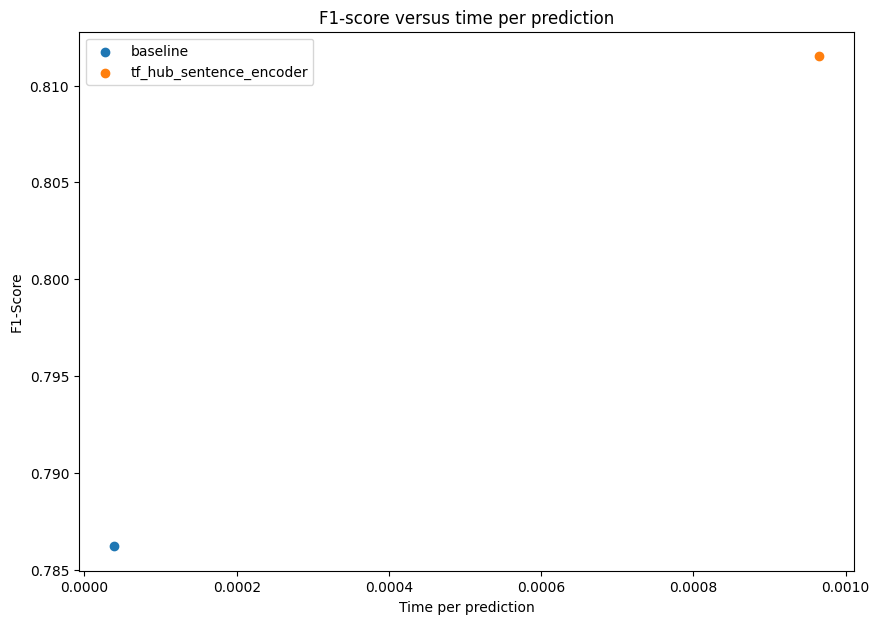

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1-score"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results["f1-score"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");

Ideal position for speed and performance tradeoff model (fast predictions with great results).

Of course, the ideal position for each of these dots is to be in the top left of the plot (low time per prediction, high F1-score).

In our case, there's a clear tradeoff for time per prediction and performance. Our best performing model takes an order of magnitude longer per prediction but only results in a few F1-score point increase.